<a href="https://colab.research.google.com/github/bartoszgajda55/Tensorflow2DeepLearning/blob/master/TF2.0%20LSTM%20Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Make the original data
series = np.sin((0.1*np.arange(400))**2)

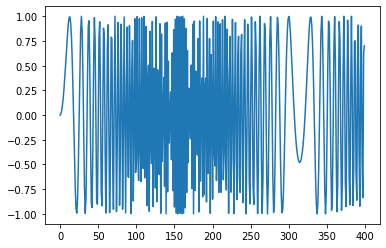

In [3]:
plt.plot(series)
plt.show()

In [4]:
# Build the dataset
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10, 1) Y.shape (390,)


In [6]:
# Try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.01)
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 20ms/step - loss: 1.3147 - val_loss: 1.4768
Epoch 2/80
7/7 [==============================] - 0s 4ms/step - loss: 1.1375 - val_loss: 1.3157
Epoch 3/80
7/7 [==============================] - 0s 4ms/step - loss: 0.9926 - val_loss: 1.1673
Epoch 4/80
7/7 [==============================] - 0s 4ms/step - loss: 0.8761 - val_loss: 1.0472
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7822 - val_loss: 0.9531
Epoch 6/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7138 - val_loss: 0.8650
Epoch 7/80
7/7 [==============================] - 0s 3ms/step - loss: 0.6551 - val_loss: 0.8045
Epoch 8/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.7579
Epoch 9/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5766 - val_loss: 0.7122
Epoch 10/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5540 - val_loss: 0.6787
Epoch 11/80
7/7 [=====================

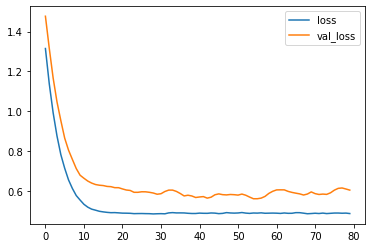

In [7]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

(390, 1)


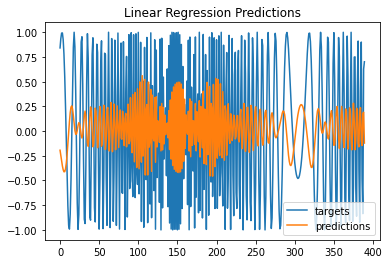

In [8]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

In [12]:
# Now try RNN/LSTM model
X = X.reshape(-1, T, 1)

i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.05)
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 61ms/step - loss: 0.5511 - val_loss: 0.5662
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4914 - val_loss: 0.6186
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4861 - val_loss: 0.5281
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4246 - val_loss: 0.5569
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3942 - val_loss: 0.4531
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3177 - val_loss: 0.3734
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2140 - val_loss: 0.2585
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1757 - val_loss: 0.3183
Epoch 9/200
7/7 [==============================] - 0s 8ms/step - loss: 0.1549 - val_loss: 0.3851
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1243 - val_loss: 0.2426
Epoch 11/200
7/7 [==========

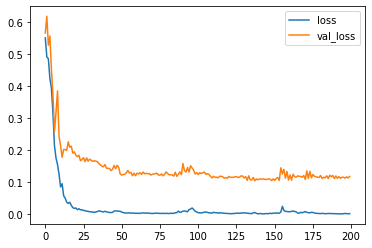

In [13]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

(390, 1)


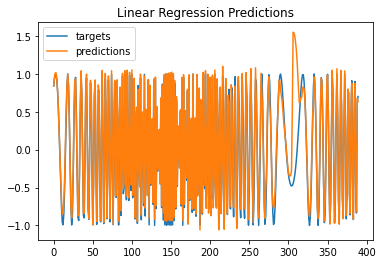

In [14]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()